In [1]:
import os
import numpy as np
import pandas as pd
from scipy.sparse import load_npz


# Load your features and labels
features_dir = 'emotionverse_features_advanced'
X_tfidf = load_npz(os.path.join(features_dir, 'tfidf_features.npz')) #sim
X_bow = load_npz(os.path.join(features_dir, 'bow_features.npz'))  # sim 
labels_df = pd.read_csv(os.path.join(features_dir, 'emotionverse_labels.csv')) # sim
allminipro = np.load(os.path.join(features_dir, 'sentence_embeddings_pro.npy')) #simm
combined_all = np.load(os.path.join(features_dir, 'combined_all.npy'),allow_pickle=True).item() # sim
combined_nrc = np.load(os.path.join(features_dir, 'combined_nrc.npy'),allow_pickle=True).item() #sim 
combined_vader = np.load(os.path.join(features_dir, 'combined_vader.npy'),allow_pickle=True).item()# sim
combined_all_bert = np.load(os.path.join(features_dir, 'combined_all_bert.npy'),allow_pickle=True).item()
combined_vader_bert = np.load(os.path.join(features_dir, 'combined_vader_bert.npy'),allow_pickle=True).item()

In [2]:
import numpy as np

X = combined_vader_bert
print("Min:", np.min(X))
print("Max:", np.max(X))
print("Mean:", np.mean(X))


Min: 0.0
Max: 1.0000001192092896
Mean: 0.05862451823810039


In [3]:
combined_vader_bert

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 769383 stored elements and shape (1874, 3490)>

In [4]:
print(labels_df["sentiment"].value_counts())


sentiment
Mixed        652
Positive     542
Negative     419
Ambiguous    158
Neutral      103
Name: count, dtype: int64



----- Sentiment Classification Results (TF-IDF) -----

Training Logistic Regression...
              precision    recall  f1-score   support

   Ambiguous       0.86      0.19      0.31        32
       Mixed       0.68      0.76      0.72       130
    Negative       0.64      0.82      0.72        84
     Neutral       1.00      0.57      0.73        21
    Positive       0.80      0.77      0.78       108

    accuracy                           0.72       375
   macro avg       0.80      0.62      0.65       375
weighted avg       0.74      0.72      0.70       375


Training Linear SVM...
              precision    recall  f1-score   support

   Ambiguous       0.59      0.41      0.48        32
       Mixed       0.74      0.75      0.74       130
    Negative       0.68      0.82      0.75        84
     Neutral       0.89      0.76      0.82        21
    Positive       0.86      0.82      0.84       108

    accuracy                           0.76       375
   macro avg       

<Figure size 1500x1000 with 0 Axes>

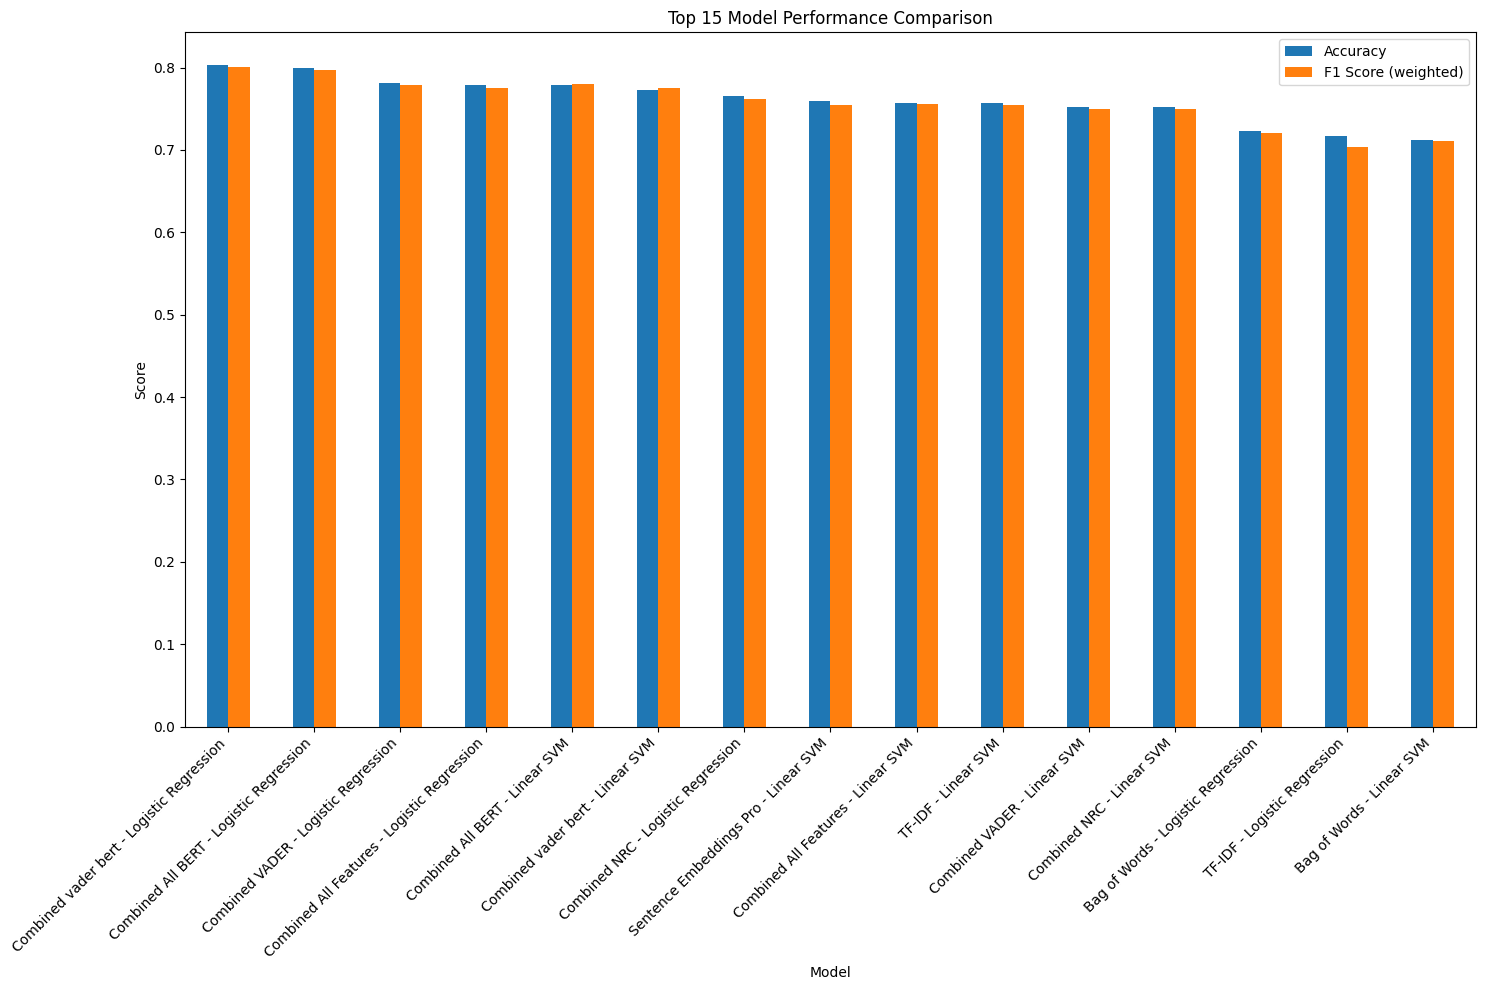

<Figure size 2000x1200 with 0 Axes>

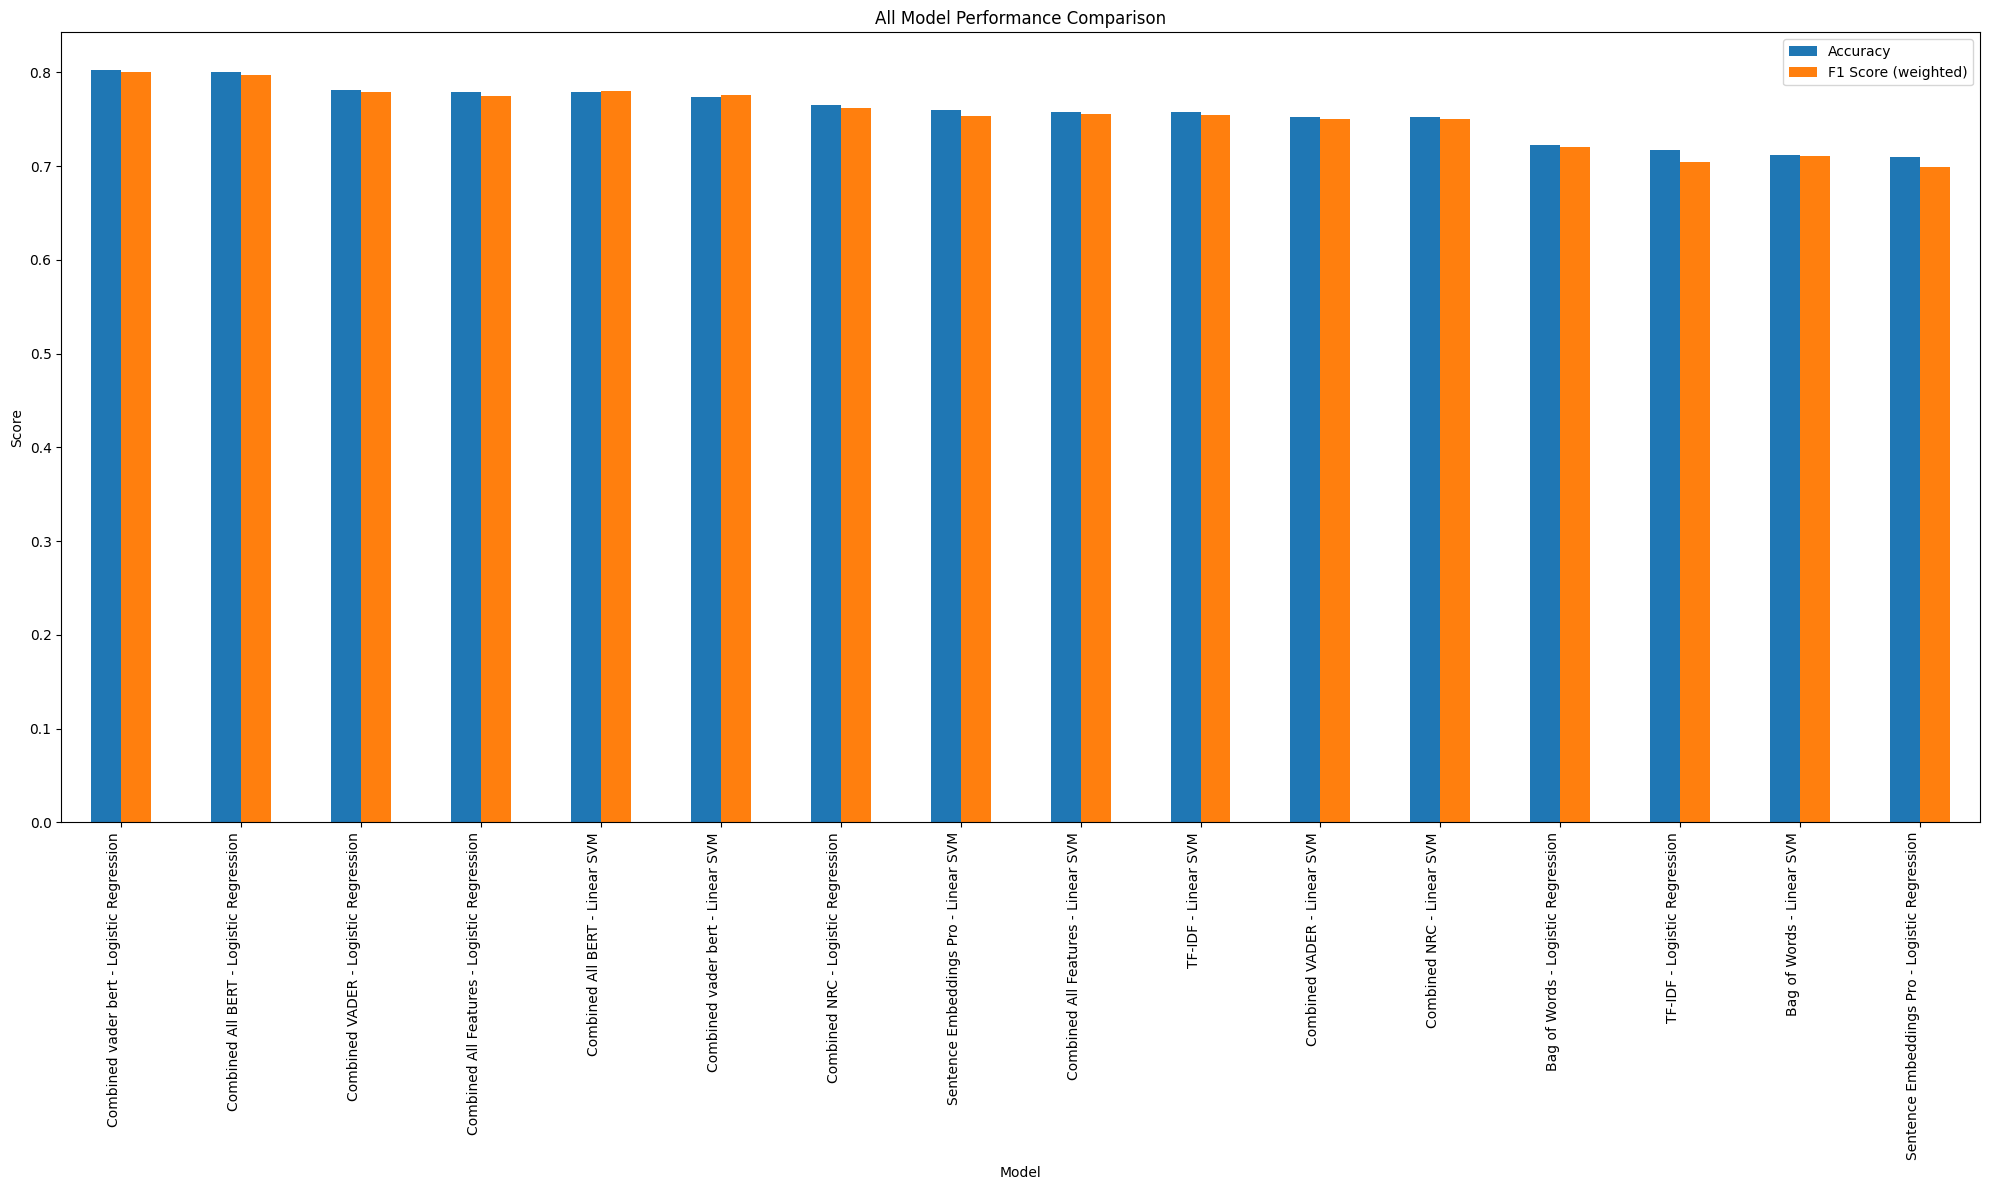


Best performing model: Combined vader bert - Logistic Regression
Accuracy: 0.8027
F1 Score: 0.8001
Best model saved as 'best_sentiment_model.pkl'

----- Top 5 Models -----
                                          Model  Accuracy  F1 Score (weighted)
14    Combined vader bert - Logistic Regression  0.802667             0.800137
12      Combined All BERT - Logistic Regression  0.800000             0.796803
10         Combined VADER - Logistic Regression  0.781333             0.778739
6   Combined All Features - Logistic Regression  0.778667             0.775013
13               Combined All BERT - Linear SVM  0.778667             0.780196


C:\Users\Rafa Parkoureiro\AppData\Local\Temp\ipykernel_29576\1745320018.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=top5_df, palette='viridis')


<Figure size 1200x800 with 0 Axes>

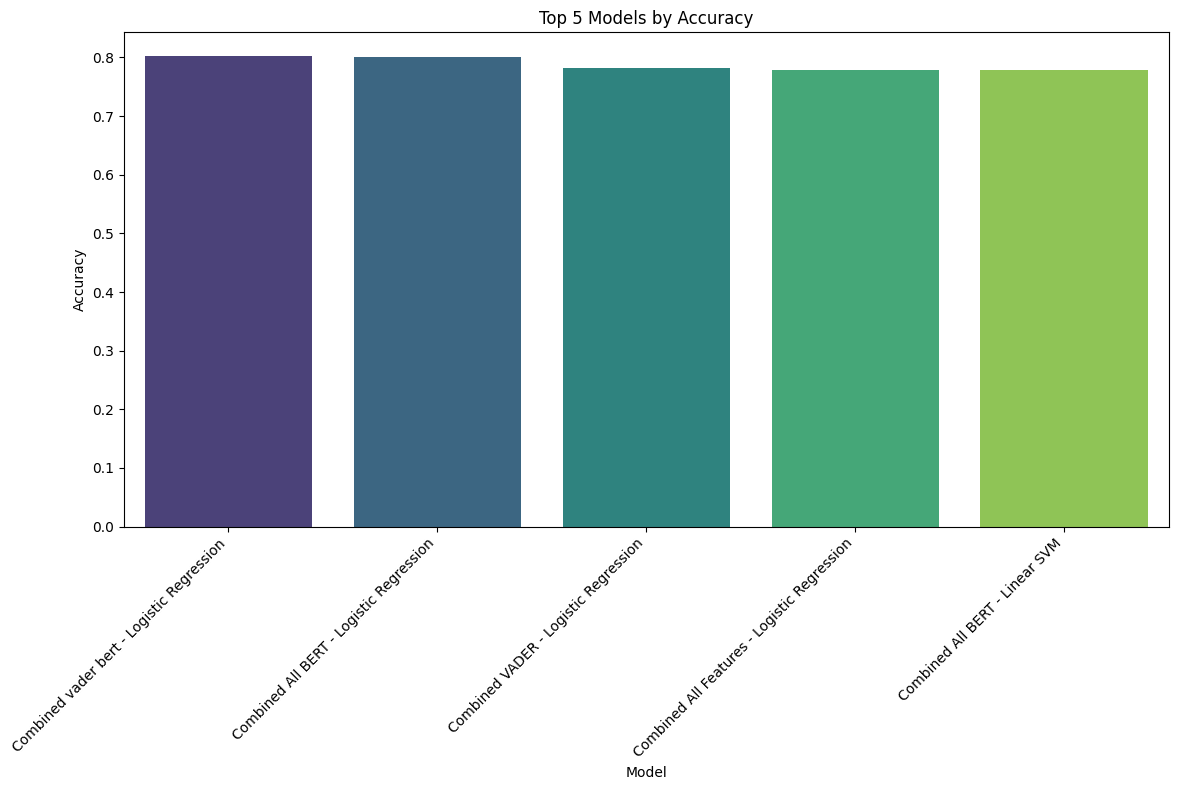


----- Feature Combination Analysis -----
Best in Traditional group: TF-IDF - Linear SVM
  Accuracy: 0.7573
  F1 Score: 0.7548
Best in Embedding-based group: Sentence Embeddings Pro - Linear SVM
  Accuracy: 0.7600
  F1 Score: 0.7540
Best in Combined group: Combined vader bert - Logistic Regression
  Accuracy: 0.8027
  F1 Score: 0.8001


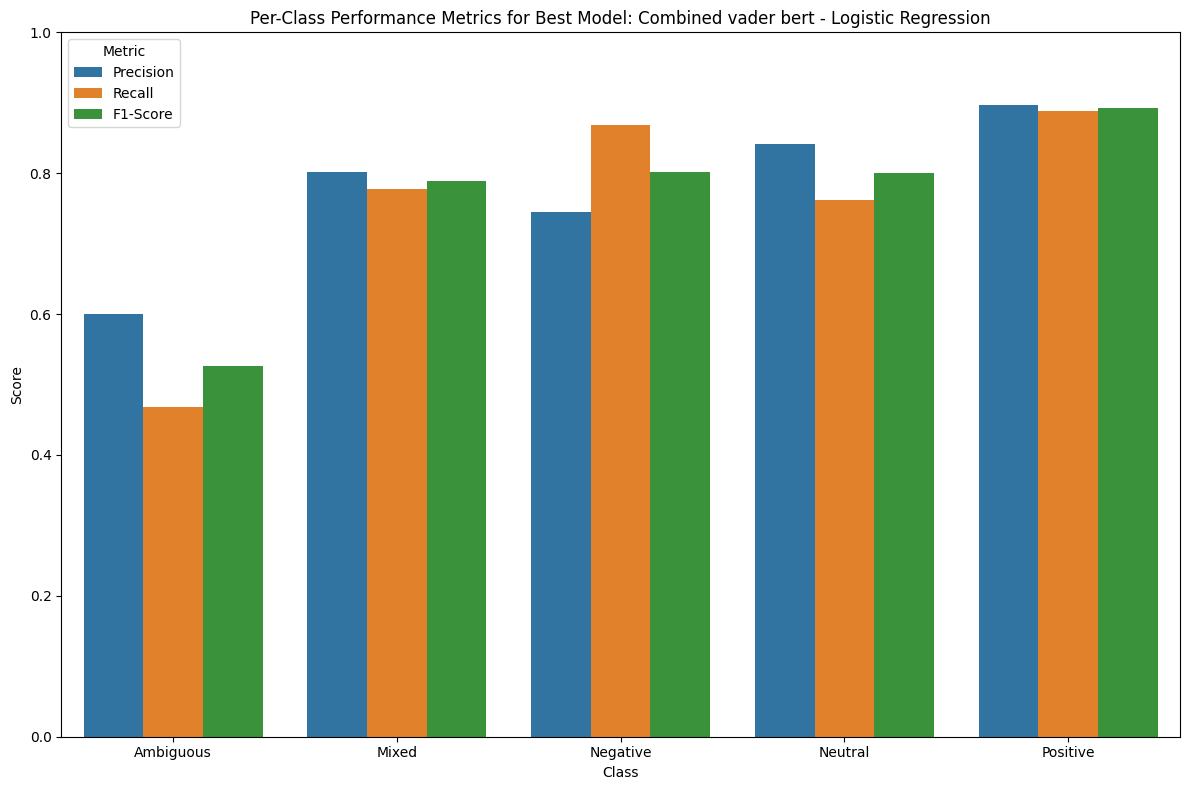

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Extract sentiment labels
y_sentiment = labels_df['sentiment']

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
    'Linear SVM': LinearSVC(C=1.0, max_iter=10000),
}

# 🚀 Split Data for Each Feature Type
X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_bow_train, X_bow_test, y_train_bow, y_test_bow = train_test_split(
    X_bow, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_allmini_trainpro, X_allmini_testpro, y_train_allminipro, y_test_allminipro = train_test_split(
    allminipro, y_sentiment, test_size=0.2, random_state=4230, stratify=y_sentiment
)

X_combined_all_train, X_combined_all_test, y_train_combined_all, y_test_combined_all = train_test_split(
    combined_all, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_combined_nrc_train, X_combined_nrc_test, y_train_combined_nrc, y_test_combined_nrc = train_test_split(
    combined_nrc, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_combined_vader_train, X_combined_vader_test, y_train_combined_vader, y_test_combined_vader = train_test_split(
    combined_vader, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_combined_all_bert_train, X_combined_all_bert_test, y_train_combined_all_bert, y_test_combined_all_bert = train_test_split(
    combined_all_bert, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

X_combined_vader_bert_train, X_combined_vader_bert_test, y_train_combined_vader_bert, y_test_combined_vader_bert = train_test_split(
    combined_vader_bert, y_sentiment, test_size=0.2, random_state=420, stratify=y_sentiment
)

# 🚀 Function to Evaluate Models and Display Results
def evaluate_models(X_train, X_test, y_train, y_test, models, feature_name):
    results = {}
    print(f"\n----- Sentiment Classification Results ({feature_name}) -----")
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store model performance
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            'accuracy': report['accuracy'],
            'weighted_f1': report['weighted avg']['f1-score'],
            'model': model
        }
        
        # Print classification report
        print(classification_report(y_test, y_pred))
        
        # Create and display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=sorted(y_test.unique()), 
                    yticklabels=sorted(y_test.unique()))
        plt.title(f'Confusion Matrix: {feature_name} - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.close()
    
    return results

# 🚀 Evaluate All Feature Types
tfidf_results = evaluate_models(X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf, models, "TF-IDF")
bow_results = evaluate_models(X_bow_train, X_bow_test, y_train_bow, y_test_bow, models, "Bag of Words")
allmini_pro_results = evaluate_models(X_allmini_trainpro, X_allmini_testpro, y_train_allminipro, y_test_allminipro, models, "Sentence Embeddings Pro")
combined_all_results = evaluate_models(X_combined_all_train, X_combined_all_test, y_train_combined_all, y_test_combined_all, models, "Combined All Features")
combined_nrc_results = evaluate_models(X_combined_nrc_train, X_combined_nrc_test, y_train_combined_nrc, y_test_combined_nrc, models, "Combined NRC")
combined_vader_results = evaluate_models(X_combined_vader_train, X_combined_vader_test, y_train_combined_vader, y_test_combined_vader, models, "Combined VADER")
combined_all_bert_results = evaluate_models(X_combined_all_bert_train, X_combined_all_bert_test, y_train_combined_all_bert, y_test_combined_all_bert, models, "Combined All BERT")
combined_vader_bert_results = evaluate_models(X_combined_vader_bert_train, X_combined_vader_bert_test, y_train_combined_vader_bert, y_test_combined_vader_bert, models, "Combined vader bert")

# 🚀 Combine All Results for Comparison
all_results = {}
for feature_name, results in zip(
    ["TF-IDF", "Bag of Words", "Sentence Embeddings Pro",
     "Combined All Features", "Combined NRC", "Combined VADER", "Combined All BERT", "Combined vader bert"],
    [tfidf_results, bow_results, allmini_pro_results,
     combined_all_results, combined_nrc_results, combined_vader_results, combined_all_bert_results,combined_vader_bert_results ]
):
    for model_name, metrics in results.items():
        key = f"{feature_name} - {model_name}"
        all_results[key] = metrics

# 🚀 Create Comparison Table
comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

# 🚀 Sort by Accuracy
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

# 🚀 Display and Save Comparison Results
print("\n----- Overall Model Comparison -----")
print(comparison_df)
comparison_df.to_csv('sentiment_model_comparison_advanced.csv', index=False)

# 🚀 Plot Comparison Bar Chart
plt.figure(figsize=(15, 10))
ax = comparison_df.head(15).plot(x='Model', y=['Accuracy', 'F1 Score (weighted)'], kind='bar', figsize=(15, 10))
plt.title('Top 15 Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Plot all models
plt.figure(figsize=(20, 12))
comparison_df.plot(x='Model', y=['Accuracy', 'F1 Score (weighted)'], kind='bar', figsize=(20, 12))
plt.title('All Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# 🚀 Find the Best Model
best_model_row = comparison_df.iloc[0]
best_model_name = best_model_row['Model']
print(f"\nBest performing model: {best_model_name}")
print(f"Accuracy: {best_model_row['Accuracy']:.4f}")
print(f"F1 Score: {best_model_row['F1 Score (weighted)']:.4f}")

# 🚀 Save the best model
feature_type, model_type = best_model_name.split(' - ')
best_model = None

# Get the best model object
feature_results_map = {
    "TF-IDF": tfidf_results,
    "Bag of Words": bow_results,
    "Sentence Embeddings Pro": allmini_pro_results,
    "Combined All Features": combined_all_results,
    "Combined NRC": combined_nrc_results,
    "Combined VADER": combined_vader_results,
    "Combined All BERT": combined_all_bert_results,
    "Combined vader bert": combined_vader_bert_results
}

if feature_type in feature_results_map:
    best_model = feature_results_map[feature_type][model_type]['model']

if best_model:
    # Save the model
    joblib.dump(best_model, 'best_sentiment_model.pkl')
    print(f"Best model saved as 'best_sentiment_model.pkl'")
    
    # Save feature type and preprocessing info
    model_info = {
        'feature_type': feature_type,
        'model_type': model_type,
        'accuracy': best_model_row['Accuracy'],
        'f1_score': best_model_row['F1 Score (weighted)']
    }
    
    with open('best_model_info.joblib', 'wb') as f:
        joblib.dump(model_info, f)
    
    # Create a feature importance plot if the model supports it
    if hasattr(best_model, 'feature_importances_'):
        # For models like Random Forest
        plt.figure(figsize=(12, 8))
        feature_importance = best_model.feature_importances_
        
        # Create feature importance visualization
        if len(feature_importance) <= 30:  # Only show if we have a reasonable number of features
            plt.bar(range(len(feature_importance)), feature_importance)
            plt.title(f'Feature Importance for {best_model_name}')
            plt.tight_layout()
            plt.show()
    elif hasattr(best_model, 'coef_'):
        # For linear models like Logistic Regression, SVM
        plt.figure(figsize=(12, 8))
        
        # Handle multi-class case
        if len(best_model.coef_.shape) > 1 and best_model.coef_.shape[0] > 1:
            # For multi-class, just plot the first class for simplicity
            coefficients = best_model.coef_[0]
        else:
            # For binary classification
            coefficients = best_model.coef_.flatten()
        
        if len(coefficients) <= 30:  # Only show if we have a reasonable number of features
            plt.bar(range(len(coefficients)), coefficients)
            plt.title(f'Feature Coefficients for {best_model_name}')
            plt.tight_layout()
            plt.show()

# 🚀 Create a detailed report of the top 5 models
top5_df = comparison_df.head(5)
print("\n----- Top 5 Models -----")
print(top5_df)

# 🚀 Create a more detailed visualization for the top 5 models
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=top5_df, palette='viridis')
plt.title('Top 5 Models by Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 🚀 Feature combination analysis
print("\n----- Feature Combination Analysis -----")
feature_groups = {
    'Traditional': ["TF-IDF", "Bag of Words"],
    'Embedding-based': ["Sentence Embeddings Pro"],
    'Combined': ["Combined All Features", "Combined NRC", "Combined VADER", "Combined All BERT", "Combined vader bert"]
}

for group_name, features in feature_groups.items():
    group_models = [model for model in comparison_df['Model'].values if any(feature in model for feature in features)]
    if group_models:
        best_in_group = comparison_df[comparison_df['Model'].isin(group_models)].iloc[0]
        print(f"Best in {group_name} group: {best_in_group['Model']}")
        print(f"  Accuracy: {best_in_group['Accuracy']:.4f}")
        print(f"  F1 Score: {best_in_group['F1 Score (weighted)']:.4f}")

# Create detailed performance per class visualization for top model
if best_model:
    if feature_type == "TF-IDF":
        X_test = X_tfidf_test
        y_test = y_test_tfidf
    elif feature_type == "Bag of Words":
        X_test = X_bow_test
        y_test = y_test_bow
    elif feature_type == "Sentence Embeddings Pro":
        X_test = X_allmini_testpro
        y_test = y_test_allminipro
    elif feature_type == "Combined All Features":
        X_test = X_combined_all_test
        y_test = y_test_combined_all
    elif feature_type == "Combined NRC":
        X_test = X_combined_nrc_test
        y_test = y_test_combined_nrc
    elif feature_type == "Combined VADER":
        X_test = X_combined_vader_test
        y_test = y_test_combined_vader
    elif feature_type == "Combined All BERT":
        X_test = X_combined_all_bert_test
        y_test = y_test_combined_all_bert
    elif feature_type == "Combined vader bert":
        X_test = X_combined_vader_bert_test
        y_test = y_test_combined_vader_bert    
        
    # Get per-class metrics
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract class metrics and create a DataFrame
    class_metrics = {}
    for class_name, metrics in report.items():
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            class_metrics[class_name] = {
                'precision': metrics['precision'],
                'recall': metrics['recall'],
                'f1-score': metrics['f1-score']
            }
    
    class_df = pd.DataFrame(class_metrics).T.reset_index()
    class_df.columns = ['Class', 'Precision', 'Recall', 'F1-Score']
    
    # Plot per-class metrics
    plt.figure(figsize=(12, 8))
    class_df_melted = pd.melt(class_df, id_vars=['Class'], var_name='Metric', value_name='Score')
    sns.barplot(x='Class', y='Score', hue='Metric', data=class_df_melted)
    plt.title(f'Per-Class Performance Metrics for Best Model: {best_model_name}')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.show()
    


In [ ]:
# with scaling : Best in Embedding-based group: Sentence Embeddings pro - Linear SVM
  #Accuracy: 0.7547
  #F1 Score: 0.7534


----- Fine-tuning Sentiment Classifier with BERT Embeddings -----
Training BERT embeddings shape: (1499, 384)
Training labels distribution: sentiment
Mixed        522
Positive     434
Negative     335
Ambiguous    126
Neutral       82
Name: count, dtype: int64

Training Logistic Regression with BERT embeddings...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
BERT Fine-tuned - Logistic Regression Test Accuracy: 0.7467
Best parameters: {'C': 10.0, 'class_weight': None, 'solver': 'liblinear'}
              precision    recall  f1-score   support

   Ambiguous       0.57      0.38      0.45        32
       Mixed       0.72      0.74      0.73       130
    Negative       0.76      0.75      0.75        84
     Neutral       0.88      0.71      0.79        21
    Positive       0.78      0.87      0.82       108

    accuracy                           0.75       375
   macro avg       0.74      0.69      0.71       375
weighted avg       0.74      0.75      0.74       375



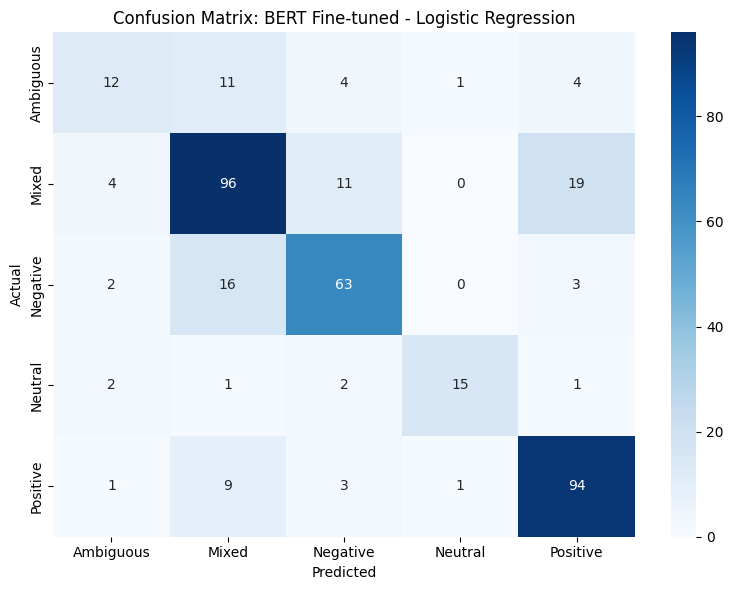


Training SVM with BERT embeddings...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
BERT Fine-tuned - SVM Test Accuracy: 0.7813
Best parameters: {'C': 10.0, 'class_weight': None, 'kernel': 'rbf'}
              precision    recall  f1-score   support

   Ambiguous       0.71      0.47      0.57        32
       Mixed       0.75      0.78      0.76       130
    Negative       0.75      0.81      0.78        84
     Neutral       0.89      0.81      0.85        21
    Positive       0.84      0.85      0.85       108

    accuracy                           0.78       375
   macro avg       0.79      0.74      0.76       375
weighted avg       0.78      0.78      0.78       375



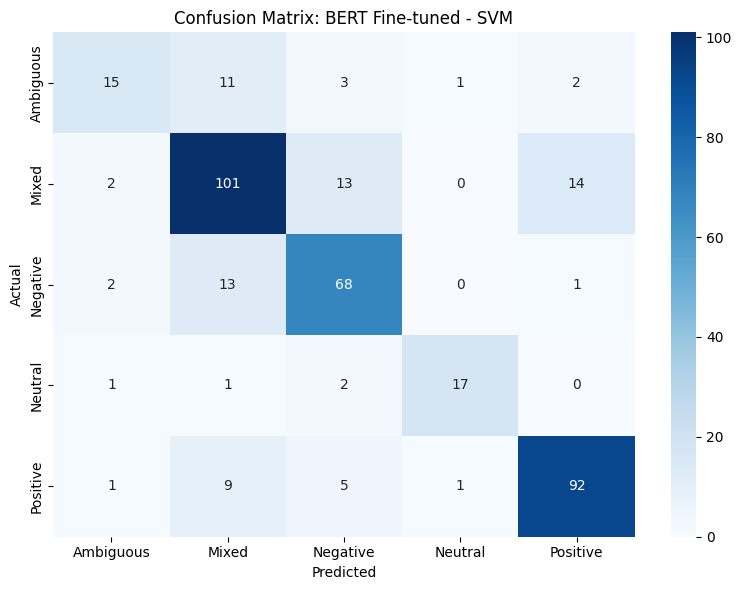


Training GradientBoosting with BERT embeddings...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
BERT Fine-tuned - GradientBoosting Test Accuracy: 0.6880
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

   Ambiguous       0.86      0.19      0.31        32
       Mixed       0.63      0.78      0.70       130
    Negative       0.66      0.70      0.68        84
     Neutral       0.78      0.33      0.47        21
    Positive       0.78      0.78      0.78       108

    accuracy                           0.69       375
   macro avg       0.74      0.56      0.59       375
weighted avg       0.71      0.69      0.67       375



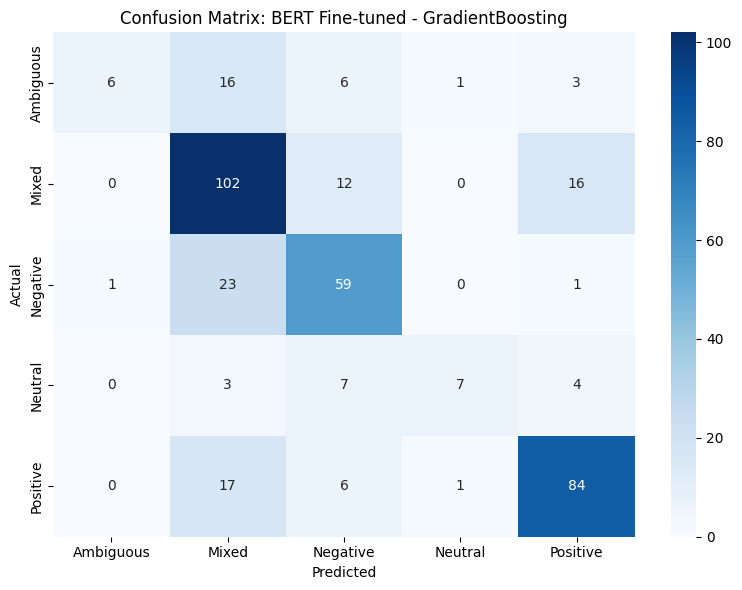


Best BERT model: BERT Fine-tuned - SVM
Accuracy: 0.7813
Saved as 'best_bert_sentiment_model.pkl'

----- Updated Model Comparison with BERT Fine-tuning -----
                                          Model  Accuracy  F1 Score (weighted)
12      Combined All BERT - Logistic Regression  0.800000             0.796803
15                        BERT Fine-tuned - SVM  0.781333             0.778436
10         Combined VADER - Logistic Regression  0.781333             0.778739
13               Combined All BERT - Linear SVM  0.778667             0.780196
6   Combined All Features - Logistic Regression  0.778667             0.775013
8            Combined NRC - Logistic Regression  0.765333             0.761879
5          Sentence Embeddings Pro - Linear SVM  0.760000             0.754039
7            Combined All Features - Linear SVM  0.757333             0.756143
1                           TF-IDF - Linear SVM  0.757333             0.754760
9                     Combined NRC - Linear SVM  0.7

<Figure size 1400x800 with 0 Axes>

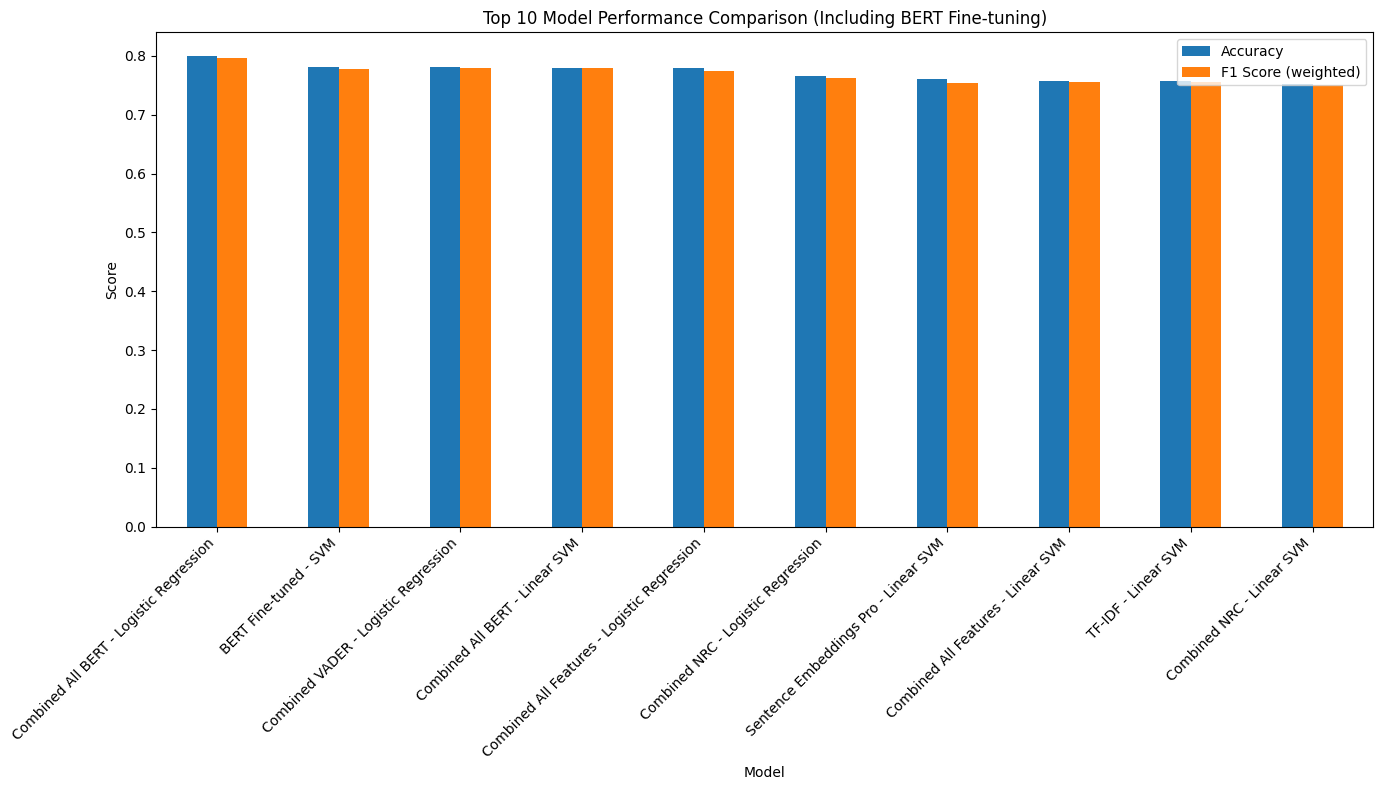


🏆 Overall best model: Combined All BERT - Logistic Regression
Accuracy: 0.8000
F1 Score: 0.7968

Best BERT fine-tuned model: BERT Fine-tuned - SVM
Accuracy: 0.7813
F1 Score: 0.7784

Best non-BERT model: Combined All BERT - Logistic Regression
Accuracy: 0.8000
BERT improvement: -2.33%


In [37]:
# 🚀 Load BERT Embeddings and Train Specialized Classifier
print("\n----- Fine-tuning Sentiment Classifier with BERT Embeddings -----")

def train_bert_sentiment_classifier(X_train, X_test, y_train, y_test, model_name="BERT Fine-tuned"):
    """
    Train and evaluate classifier using pre-extracted BERT embeddings
    
    Parameters:
    - X_train: Training BERT embeddings
    - X_test: Testing BERT embeddings
    - y_train: Training sentiment labels
    - y_test: Testing sentiment labels
    - model_name: Name to identify this model
    
    Returns:
    - results: Dictionary with model and performance metrics
    """
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    import joblib
    
    # Define more sophisticated models and hyperparameter grids
    bert_models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=2000, random_state=420),
            'params': {
                'C': [0.1, 1.0, 10.0],
                'solver': ['liblinear', 'saga'],
                'class_weight': [None, 'balanced']
            }
        },
        'SVM': {
            'model': SVC(probability=True, random_state=420),
            'params': {
                'C': [0.1, 1.0, 10.0],
                'kernel': ['linear', 'rbf'],
                'class_weight': [None, 'balanced']
            }
        },
        'GradientBoosting': {
            'model': GradientBoostingClassifier(random_state=420),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.05, 0.1],
                'max_depth': [3, 5]
            }
        }
    }
    
    results = {}
    best_accuracy = 0
    best_model = None
    best_model_name = None
    
    # Print training dataset shape
    print(f"Training BERT embeddings shape: {X_train.shape}")
    print(f"Training labels distribution: {pd.Series(y_train).value_counts()}")
    
    # Train and evaluate each model
    for clf_name, clf_info in bert_models.items():
        print(f"\nTraining {clf_name} with BERT embeddings...")
        
        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(
            clf_info['model'], 
            clf_info['params'], 
            cv=5, 
            scoring='accuracy',
            verbose=1,
            n_jobs=-1
        )
        
        grid_search.fit(X_train, y_train)
        
        # Get best model
        model = grid_search.best_estimator_
        
        # Predict on test set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store model performance
        full_name = f"{model_name} - {clf_name}"
        results[full_name] = {
            'model': model,
            'accuracy': accuracy,
            'best_params': grid_search.best_params_,
            'weighted_f1': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
        }
        
        # Print results
        print(f"{full_name} Test Accuracy: {accuracy:.4f}")
        print(f"Best parameters: {grid_search.best_params_}")
        print(classification_report(y_test, y_pred))
        
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=sorted(pd.Series(y_test).unique()), 
                    yticklabels=sorted(pd.Series(y_test).unique()))
        plt.title(f'Confusion Matrix: {full_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()
        
        # Update best model if needed
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_model_name = full_name
    
    # Save the best model
    if best_model:
        joblib.dump(best_model, f'best_bert_sentiment_model.pkl')
        print(f"\nBest BERT model: {best_model_name}")
        print(f"Accuracy: {best_accuracy:.4f}")
        print(f"Saved as 'best_bert_sentiment_model.pkl'")
        
        # Save model info
        model_info = {
            'model_name': best_model_name,
            'accuracy': best_accuracy,
            'f1_score': results[best_model_name]['weighted_f1']
        }
        
        with open('best_bert_model_info.joblib', 'wb') as f:
            joblib.dump(model_info, f)
    
    return results

# Now train the BERT-based models
# Assuming X_allmini_trainpro contains your BERT embeddings
bert_results = train_bert_sentiment_classifier(
    X_allmini_trainpro, 
    X_allmini_testpro, 
    y_train_allminipro, 
    y_test_allminipro,
    "BERT Fine-tuned"
)

# Add BERT results to the overall comparison
for model_name, metrics in bert_results.items():
    all_results[model_name] = {
        'accuracy': metrics['accuracy'],
        'weighted_f1': metrics['weighted_f1'],
        'model': metrics['model']
    }

# Create updated comparison table
updated_comparison_df = pd.DataFrame({
    'Model': [k for k in all_results.keys()],
    'Accuracy': [v['accuracy'] for v in all_results.values()],
    'F1 Score (weighted)': [v['weighted_f1'] for v in all_results.values()]
})

# Sort by Accuracy
updated_comparison_df = updated_comparison_df.sort_values('Accuracy', ascending=False)

# Display and save updated comparison
print("\n----- Updated Model Comparison with BERT Fine-tuning -----")
print(updated_comparison_df.head(10))
updated_comparison_df.to_csv('sentiment_model_comparison_with_bert.csv', index=False)

# Plot updated comparison for top 10 models
plt.figure(figsize=(14, 8))
updated_comparison_df.head(10).plot(
    x='Model', 
    y=['Accuracy', 'F1 Score (weighted)'], 
    kind='bar', 
    figsize=(14, 8)
)
plt.title('Top 10 Model Performance Comparison (Including BERT Fine-tuning)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Find overall best model
overall_best_model = updated_comparison_df.iloc[0]['Model']
print(f"\n🏆 Overall best model: {overall_best_model}")
print(f"Accuracy: {updated_comparison_df.iloc[0]['Accuracy']:.4f}")
print(f"F1 Score: {updated_comparison_df.iloc[0]['F1 Score (weighted)']:.4f}")

# Compare traditional models vs fine-tuned BERT
bert_models = [model for model in updated_comparison_df['Model'] if "BERT Fine-tuned" in model]
best_bert = updated_comparison_df[updated_comparison_df['Model'].isin(bert_models)].iloc[0] if bert_models else None

if best_bert is not None:
    print(f"\nBest BERT fine-tuned model: {best_bert['Model']}")
    print(f"Accuracy: {best_bert['Accuracy']:.4f}")
    print(f"F1 Score: {best_bert['F1 Score (weighted)']:.4f}")
    
    # Calculate improvement over best non-BERT model
    non_bert_models = [model for model in updated_comparison_df['Model'] if "BERT Fine-tuned" not in model]
    best_non_bert = updated_comparison_df[updated_comparison_df['Model'].isin(non_bert_models)].iloc[0]
    
    improvement = (best_bert['Accuracy'] - best_non_bert['Accuracy']) / best_non_bert['Accuracy'] * 100
    
    print(f"\nBest non-BERT model: {best_non_bert['Model']}")
    print(f"Accuracy: {best_non_bert['Accuracy']:.4f}")
    print(f"BERT improvement: {improvement:.2f}%")